In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Replace '?' with NaN and drop rows with missing values
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)

# Convert data types
df = df.astype({
    'ca': 'float64',
    'thal': 'float64'
})


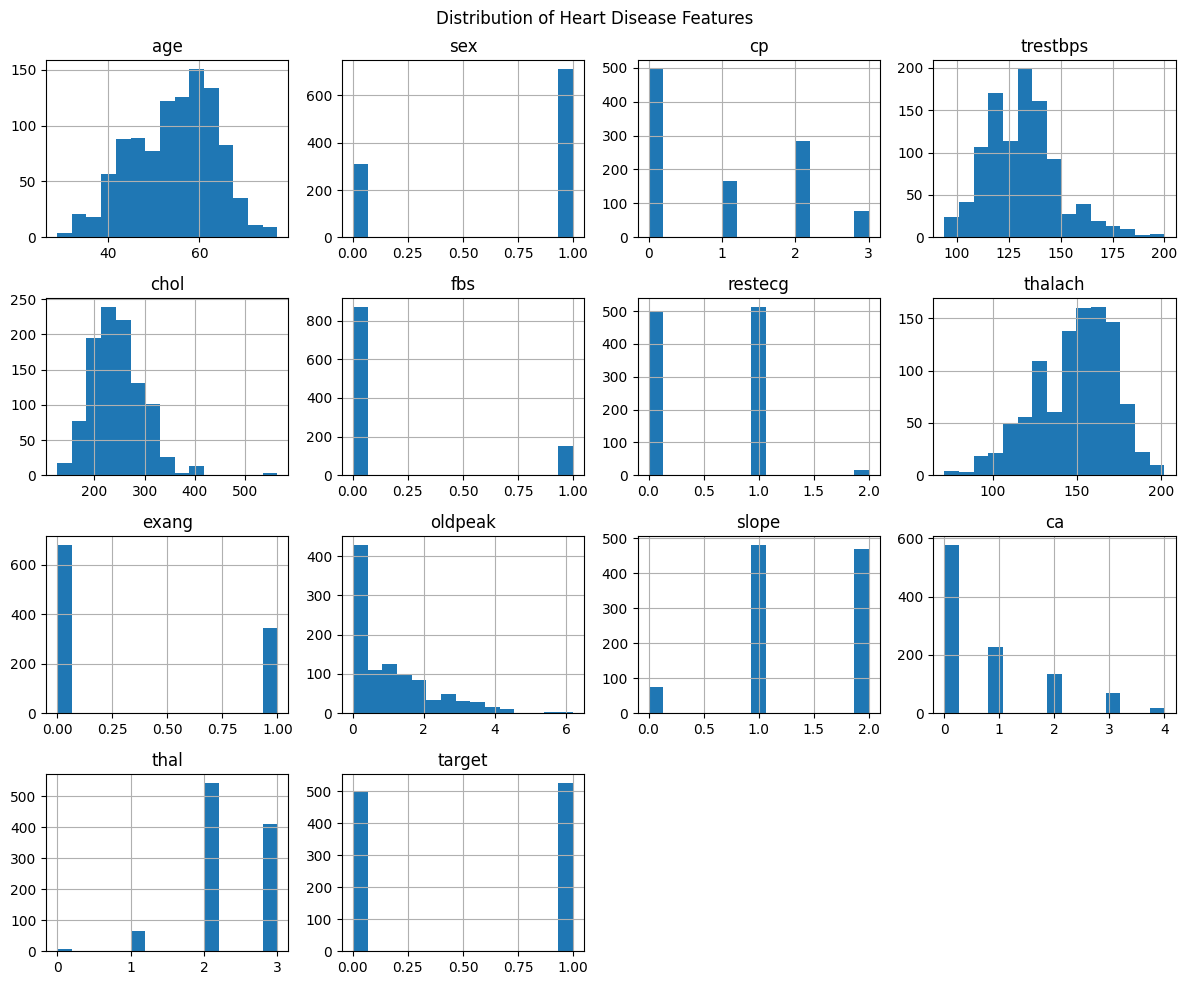

In [4]:
df.hist(figsize=(12, 10), bins=15)
plt.suptitle('Distribution of Heart Disease Features')
plt.tight_layout()
plt.show()


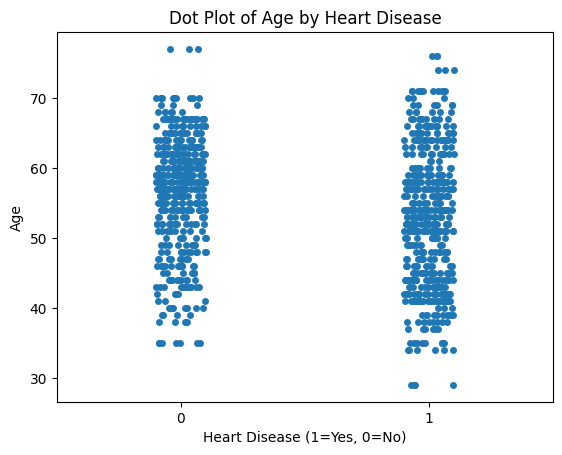

In [6]:
sns.stripplot(data=df, x='target', y='age', jitter=True)
plt.title('Dot Plot of Age by Heart Disease')
plt.xlabel('Heart Disease (1=Yes, 0=No)')
plt.ylabel('Age')
plt.show()


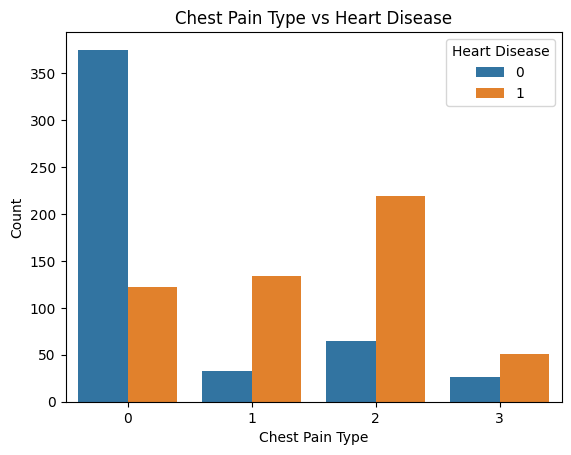

In [7]:
sns.countplot(data=df, x='cp', hue='target')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.show()


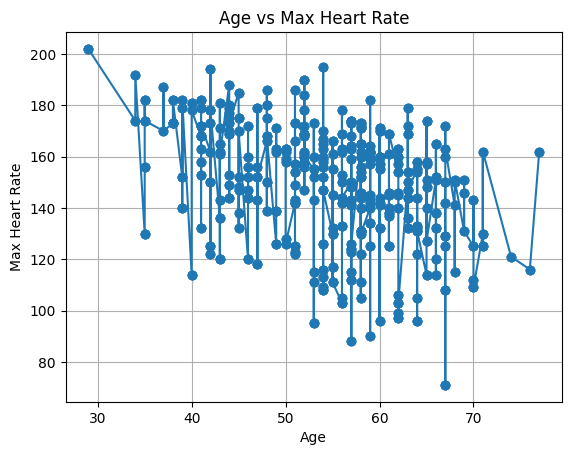

In [8]:
df_sorted = df.sort_values('age')
plt.plot(df_sorted['age'], df_sorted['thalach'], marker='o')
plt.title('Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.grid(True)
plt.show()


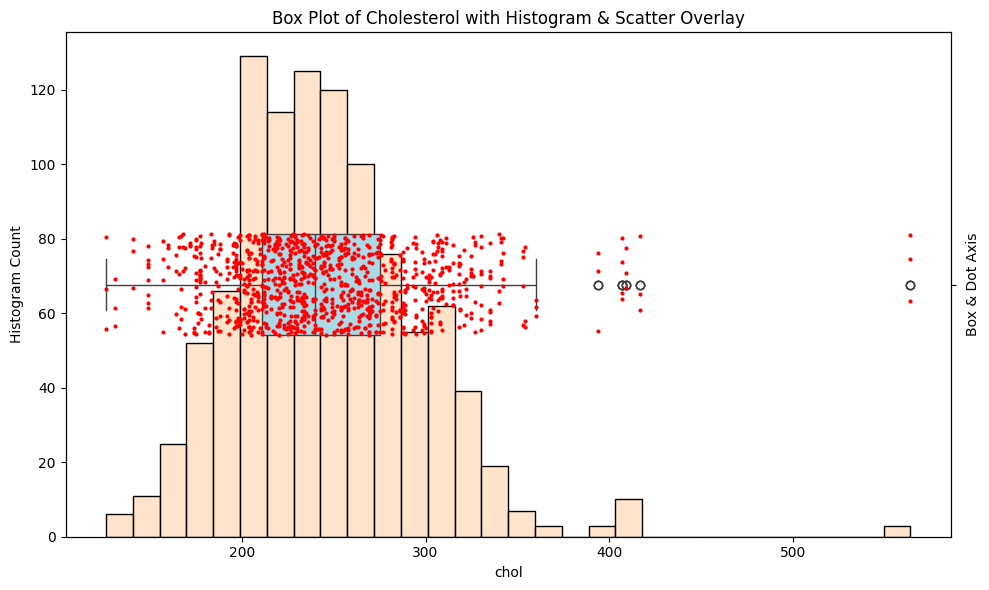

In [9]:

df = df[df['chol'] != 0]  # Filter out invalid zero cholesterol if any

plt.figure(figsize=(10, 6))

# Histogram in the background using second y-axis
ax1 = sns.histplot(df['chol'], bins=30, kde=False, color='peachpuff', edgecolor='black')

# Create secondary y-axis
ax2 = ax1.twinx()

# Box plot overlayed on same x-axis
sns.boxplot(x=df['chol'], ax=ax2, width=0.2, boxprops=dict(facecolor='lightblue'))

# Scatter plot (dot plot)
sns.stripplot(x=df['chol'], ax=ax2, color='red', size=3, jitter=True)

# Titles and labels
plt.title('Box Plot of Cholesterol with Histogram & Scatter Overlay')
ax1.set_ylabel('Histogram Count')
ax2.set_ylabel('Box & Dot Axis')

plt.tight_layout()
plt.show()


In [ ]:
plt.hist